## Read HRES Data

Define the directories:

see `DATA_MANAGE.ipynb` for more info regarding data directories

### 1. HRES Data Availibility

Check the available data for an HRES data directory and make barcode plots.

### 2. Glimpse on the original HRES data (files in `HRES_OR`)

### 3. Glimpse on preprocessed HRES data (`HRES_PP`)

to make sure the matadata and attributes look fine.

### 4. Validate and Control HRES_PP data 

Check for validity of the preprocessing (specially deltat operation) procedure on the data.

In [2]:
# import libraries and directories
from py_env_hpc import *

### 1. HRES Data Availibility

In [3]:
dateformat="%Y%m%d.%H"
date_digit_start=13
date_digit_end=24

# Find gaps in the data
datelist = Func.datelist_generator(HRES_OR, dateformat, date_digit_start, date_digit_end)
data_gaps = Func.find_data_gaps(datelist, daily_flag=True)
data_gaps

,Start Date,End Date


### 2. Glimpse on the original HRES data (files in `HRES_OR`)


In [2]:
file=sorted(os.listdir(HRES_OR))[506]
print(file)
data = xr.open_dataset(HRES_OR+"/"+file)
data
#data["tp"][:100, 50, 50].values

ADAPTER_DE05_20211119.12.0-90-1.boundary_1.nc


<xarray.Dataset>
Dimensions:    (longitude: 196, latitude: 125, time: 91)
Coordinates:
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
  * time       (time) datetime64[ns] 2021-11-19T12:00:00 ... 2021-11-23T06:00:00
Data variables:
    ssrd       (time, latitude, longitude) float32 ...
    strd       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    q          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-19 18:32:43 GMT by grib_to_netcdf-2.23.0: grib_to_n...

### 3. Glimpse on preprocessed HRES data (`HRES_PP`)

to make sure the matadata and attributes look fine.

HRES_PP_202007_202304.nc


<xarray.Dataset>
Dimensions:    (time: 24816, longitude: 196, latitude: 125)
Coordinates:
  * time       (time) datetime64[ns] 2020-07-01T13:00:00 ... 2023-05-01T12:00:00
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
Data variables:
    pr         (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      2022.10.21: cdo -O -b F64 -seltimestep,1/24 -deltat -mulc,1...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

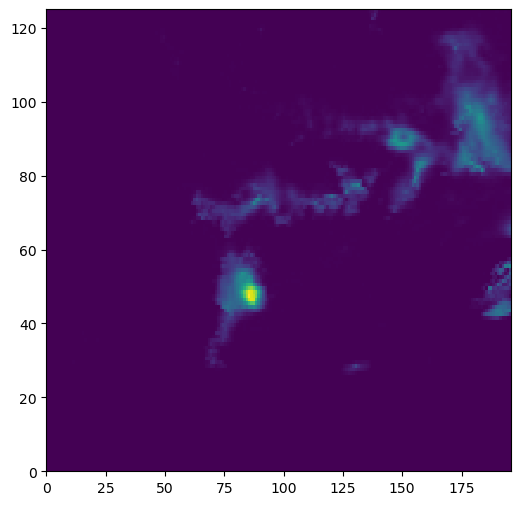

In [4]:
file="HRES_PP_202007_202304.nc"
print(file)
data = xarray.open_dataset(HRES_PP+"/"+file)

# plot the data map for pr
pl.figure(figsize=(6, 6), dpi=100)
pl.pcolormesh(data["pr"][7000, ...])

data

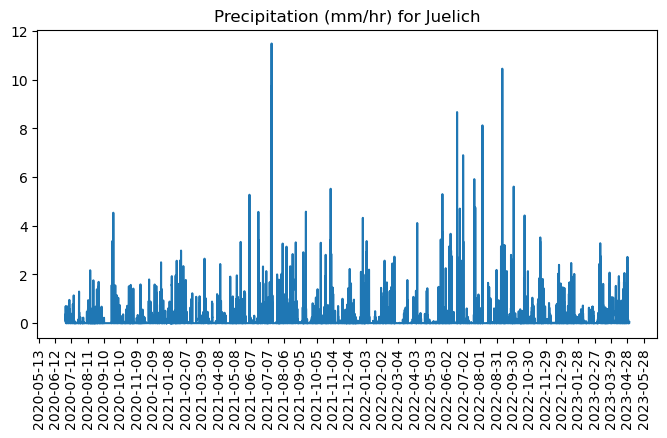

In [5]:
# plot time series for Juelich altdorfer str.
# Juelich lat/lon
in_lat = 50.91
in_lon = 6.35

lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]

# Find the nearest indices
lat_idx = Func.geo_idx(in_lat, lats)
lon_idx = Func.geo_idx(in_lon, lons)

pl.figure(figsize=(8, 4), dpi=100)
ax = pl.gca()
pl.plot(data["time"], data["pr"][:, lat_idx, lon_idx])
pl.title("Precipitation (mm/hr) for Juelich");
pl.xticks(rotation=90);
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))

### 4. Validate and Control HRES_PP data 

Check for validity of the preprocessing (specially deltat operation) procedure on the data.

In [ ]:
#3a. 
#! for plotting it on juelich, use lat_idx and lon_idx from the previous code cells

time_or=24      #ranges between 0-89 for 13UTC till 90hours later.
time_pp=12     #ranges between 0-24 for 13UTC till 12UTC next day (starting from 12UTC)

or_files=sorted(os.listdir(HRES_OR))
pp_file =os.listdir(HRES_PP)[0]
precip_or=np.array([])
for file in or_files:
    OR_A = xarray.open_dataset(HRES_OR+"/"+file)["tp"][time_or-1, lat_idx, lon_idx].values*1000
    OR_B = xarray.open_dataset(HRES_OR+"/"+file)["tp"][time_or, lat_idx, lon_idx].values*1000
    precip = OR_B-OR_A
    precip_or=np.append(precip_or, precip)
    precip_pp = xarray.open_dataset(HRES_PP+"/"+pp_file)["pr"].sel(time=datetime.time(time_pp))[:, lat_idx, lon_idx]

pl.figure(figsize=(8, 2), dpi=150)
pl.plot(precip_pp, "^", ms=8, label="preprocessed")
pl.plot(precip_or, "^", ms=4, label="raw")
pl.legend()
pl.ylim(0, 5)

### 5. Glimpse on postprocessed HRES data (`FORCING`)

to compare it with `HRES_OR` and make sure the data, matadata and attributes look fine.

In [3]:
# original data
file=sorted(os.listdir(HRES_OR))[0]
print(file)
data = xr.open_dataset(HRES_OR+"/"+file)
data
#data["tp"][:25, 50, 50].values

ADAPTER_DE05_20200701.12.0-90-1.boundary_1.nc


<xarray.Dataset>
Dimensions:    (longitude: 196, latitude: 125, time: 91)
Coordinates:
  * longitude  (longitude) float32 -1.1 -1.0 -0.9 -0.8 ... 18.1 18.2 18.3 18.4
  * latitude   (latitude) float32 56.5 56.4 56.3 56.2 ... 44.4 44.3 44.2 44.1
  * time       (time) datetime64[ns] 2020-07-01T12:00:00 ... 2020-07-05T06:00:00
Data variables:
    ssrd       (time, latitude, longitude) float32 ...
    strd       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    q          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-01-24 05:38:19 GMT by grib_to_netcdf-2.19.1: grib_to_n...

In [3]:
# postprocessed data
file=sorted(os.listdir(ORIG_HRES+"/2020/"))[0]
print(file)
postpodata = xr.open_dataset(ORIG_HRES+"/2020/"+file)
postpodata
postpodata["tp"][:25, 50, 50].values

ADAPTER_DE05_20200701.12.0-90-1.boundary_1.nc


array([0.0000000e+00, 3.6731362e-06, 7.3462725e-06, 7.3462725e-06,
       2.4482608e-05, 1.4689565e-04, 1.8117204e-04, 1.8117204e-04,
       1.8117204e-04, 1.8117204e-04, 1.8117204e-04, 1.8117204e-04,
       1.8117204e-04, 1.8117204e-04, 1.8117204e-04, 1.8117204e-04,
       1.8239766e-04, 1.8239766e-04, 1.8361956e-04, 2.1912158e-04,
       3.0725822e-04, 3.6234409e-04, 3.6234409e-04, 3.6234409e-04,
       4.1008741e-04], dtype=float32)